In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Data Processing

In [0]:
# Import Python packages
import pandas as pd
import numpy as np

# Read csv files
part0 = pd.read_csv('s3://proscoreseast/watchrate/video_features_0000_part_00.csv', sep="|", header=None)

# Add column names
part0.columns = ["videoid", "analysistype", "timestamp", "confidence", "name", "image_number"]

In [7]:
# Remove the last column
del part0['image_number']
# Take a look at the shape of the dataset (12 million rows and 5 columns)
part0.shape

(12164456, 5)

Let's take a look at analysis types and see which ones appear most often.

In [8]:
# Convert analysistype dtype from object to string
part0['analysistype'] = part0['analysistype'].astype('str')
part0['analysistype'] = part0['analysistype'].str.replace(" ", "")

# Sort by analysistype counts
df = part0.groupby('analysistype')['videoid'].nunique().sort_values(ascending=False).reset_index(name='count')
df

,analysistype,count
0,Objects,45181
1,FaceAnalysis,30719
2,Labels,16515
3,TextOnImage,14106
4,Celebrities,6401
5,nan,0


Are there certain words that feature more often in name? I'll attempt to figure this out using a word-cloud visualization.

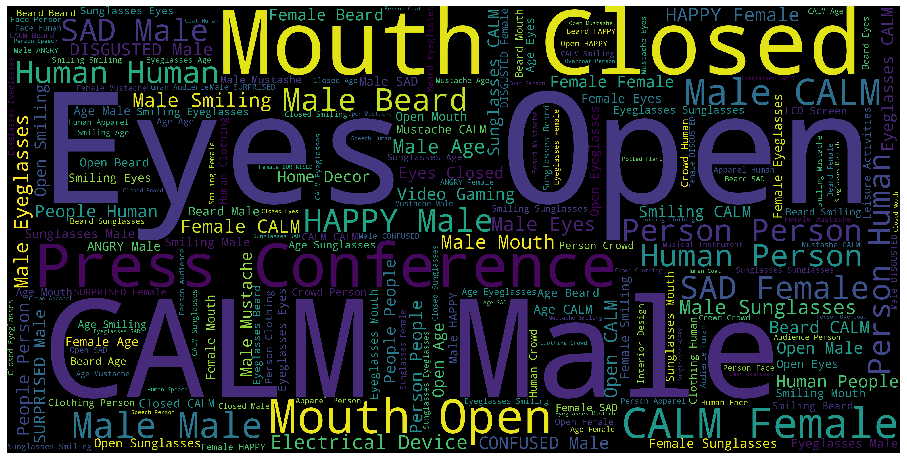

In [9]:
# Import new libraries
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Convert name dtype from object to string
part0['name'] = part0['name'].astype('str')

# Create a wordcloud of the video titles
name_corpus = ' '.join(part0['name'])
name_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(name_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,12))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

Group the data by video ID, so that each row contains information on 1 video.

In [10]:
part0.head(20)

,videoid,analysistype,timestamp,confidence,name
0,facebook10155067069663387,Labels,58.353,90.437698,Poster
1,facebook10155364926830891,Celebrities,119.039,50.000000,Jehu Chiapas
2,facebook10155075772575891,Labels,37.328,97.826202,People
3,facebook785413718297681,Labels,34.805,99.099899,Human
4,facebook840922959413423,Labels,45.815,97.817497,People
5,facebook1174272939259455,Labels,9.779,80.399902,Person
6,facebook1150586874961395,Labels,34.387,97.881500,Person
7,facebook10154270133162922,Labels,26.880,68.899498,Girl
8,facebook1298033733657850,Labels,29.149,75.195999,Harbor
9,facebook10156051909575891,Labels,9.403,53.896301,Forest


In [11]:
df = part0.groupby('videoid', as_index=False).agg(lambda x: x.tolist())
# Check the shape of the new dataframe (48,781 videos)
print(df.shape)

(48781, 5)


In [34]:
# Take only a subset of the dataframe (25%) to work with (because of the large size)
df = df.head(int(len(df)*(25/100)))
print(df.shape)

                     videoid  ...                                               name
0    brightcove4503778813001  ...  ["'Outdoors'", "'Swimming'", "'Blonde'", "'Wat...
1    brightcove4509369608001  ...  ["'Airplane'", "'Vegetation'", "'Lecture'", "'...
2    brightcove4520832752001  ...  ["'Transportation'", "'Display'", "'Costume'",...
3    brightcove4523729868001  ...  ["'Apparel'", "'Car'", "'SportsCar'", "'Evenin...
4    brightcove4527056448001  ...  ["'Flyer'", "'Driving'", "'Advertisement'", "'...
..                       ...  ...                                                ...
757  brightcove5856912065001  ...  ["'Accessories'", "'DoesNotHaveMustashe'", "'S...
758  brightcove5856922745001  ...  ["'Vehicle'", "'Person'", "'Transportation'", ...
759  brightcove5859471694001  ...  ["'Clothing'", "'Jacket'", "'Coat'", "'Texture...
760  brightcove5966642566001  ...  ["'Condo'", "'Person'", "'Vehicle'", "'Car'", ...
761  brightcove5968088928001  ...  ["'Transportation'", "'Car'", 

In [13]:
# Take a look at the top 5 rows of this dataframe
df.head()

,videoid,analysistype,timestamp,confidence,name
0,brightcove4503778813001,"[Objects, Objects, Objects, Objects, Objects, ...","[30.0, 28.0, 18.0, 22.0, 7.0, 14.0, 4.0, 21.0,...","[99.1913604736328, 64.07984161376953, 57.24409...","[Outdoors, Swimming, Blonde, Water, Human, Fac..."
1,brightcove4509369608001,"[Objects, Objects, Objects, Objects, Objects, ...","[28.0, 19.0, 6.0, 13.0, 19.0, 7.0, 26.0, 10.0,...","[64.69947052001953, 81.00973510742188, 55.9039...","[Airplane, Vegetation, Lecture, Child, Town, S..."
2,brightcove4520832752001,"[Objects, Objects, Objects, Objects, Objects, ...","[1.0, 20.0, 10.0, 22.0, 5.0, 1.0, 9.0, 3.0, 6....","[57.52568817138672, 59.65675735473633, 55.0348...","[Transportation, Display, Costume, Vehicle, Ch..."
3,brightcove4523729868001,"[Objects, Objects, Objects, Objects, Objects, ...","[9.0, 26.0, 38.0, 12.0, 25.0, 30.0, 25.0, 14.0...","[95.1951904296875, 99.96717834472656, 58.86226...","[Apparel, Car, Sports Car, Evening Dress, Tran..."
4,brightcove4527056448001,"[Objects, Objects, Objects, Objects, Objects, ...","[4.0, 47.0, 4.0, 5.0, 48.0, 21.0, 47.0, 38.0, ...","[59.07167053222656, 84.02063751220702, 62.2674...","[Flyer, Driving, Advertisement, Transportation..."


In [14]:
# Take a look at the bottom 5 rows of this dataframe
df.tail()

,videoid,analysistype,timestamp,confidence,name
12190,facebook10155494696753387,"[Labels, Labels, Labels, Labels, Labels, Label...","[9.995, 0.9860000000000002, 16.602, 38.357, 20...","[98.7844009399414, 98.98570251464844, 98.76869...","[Person, Human, Human, Human, Car, Magazine, M..."
12191,facebook10155494718648387,"[Labels, Labels, Labels, Labels, Labels, Label...","[16.402, 10.995999999999999, 13.799, 16.001, 3...","[96.87490081787108, 52.46480178833008, 98.0162...","[People, Forest, Bird, Parrot, Plant, Vegetati..."
12192,facebook10155494969258387,"[Celebrities, Celebrities, Celebrities, Celebr...","[83.936, 57.076, 65.25, 12.731, 25.611, 32.751...","[50.0, 50.0, 50.0, 50.0, 57.95209884643554, 50...","[Gautam Rode, Gautam Rode, Gautam Rode, Gautam..."
12193,facebook10155494995118387,"[Labels, Labels, Labels, Labels, Labels, Label...","[36.088, 14.6, 38.691, 22.041, 20.239, 4.39, 6...","[69.57420349121094, 84.50539398193358, 50.6146...","[Lip, Mouth, Envelope, Child, Lip, Mouth, Mout..."
12194,facebook10155496033275891,"[Labels, Labels, Labels, Labels, Labels, Label...","[54.174, 52.172, 11.598, 55.575, 65.051, 60.38...","[64.65049743652344, 60.32369613647461, 67.3049...","[Nature, Nature, Ferry, Chair, Dinghy, Jar, Bo..."


In [15]:
# Take a look at random 5 rows of this dataframe
df.sample(5)

,videoid,analysistype,timestamp,confidence,name
9003,facebook10155094099174205,"[Objects, Objects, Objects, Objects, Objects, ...","[10.0, 34.0, 121.0, 54.0, 149.0, 96.0, 39.0, 1...","[75.3061294555664, 99.08435821533205, 57.78693...","[Shirt, Accessory, Necktie, Person, Clothing, ..."
5336,facebook10154493703100891,"[Labels, Labels, Labels, Labels, Labels, Label...","[2.397, 2.814, 17.579, 29.799, 0.812, 34.596, ...","[97.31379699707031, 97.21599578857422, 98.5402...","[Produce, Produce, Person, Beer Glass, Alcohol..."
9948,facebook10155224317850891,"[Labels, Labels, Labels, Labels, Labels, Label...","[7.986, 81.30899999999998, 24.919, 4.607, 79.9...","[98.1571044921875, 67.70349884033203, 99.08360...","[People, Trademark, Person, Person, Logo, Food..."
5356,facebook10154498474213387,"[Labels, Labels, Labels, Labels, Labels, Label...","[11.598, 9.396, 34.12, 30.717, 5.392, 30.917, ...","[81.4749984741211, 56.72590255737305, 50.84000...","[Trademark, Word, Spiral, Clinic, People, Hosp..."
8320,facebook10155015031294205,"[Objects, Objects, Objects, Objects, Objects, ...","[21.0, 267.0, 47.0, 69.0, 119.0, 196.0, 240.0,...","[91.34576416015624, 57.3067512512207, 74.17946...","[Teen, Kid, Girl, Text, Photo, Coat, Press Con..."


## Recommendation Model

In [16]:
# Modify name column
df['name'] = df['name'].astype(str).str.replace(' ', '')
df['name'] = df['name'].astype(str).str.replace('[', '')
df['name'].head(25)

0     'Outdoors','Swimming','Blonde','Water','Human'...
1     'Airplane','Vegetation','Lecture','Child','Tow...
2     'Transportation','Display','Costume','Vehicle'...
3     'Apparel','Car','SportsCar','EveningDress','Tr...
4     'Flyer','Driving','Advertisement','Transportat...
5     'Sleeve','Photo','Clothing','Transportation','...
6     'Human','Face','Outdoors','Girl','Nature','Sho...
7     'Car','Windshield','Girl','Robe','Light','CarW...
8     'Outdoors','Necklace','Clothing','Child','Appa...
9     'Plant','Rainforest','Aircraft','Park','Alphab...
10    'Face','Blonde','Nature','Tire','Aircraft','Wh...
11    'Helmet','Machine','Display','Human','Kid','Tr...
12    'Clothing','Lighting','SportsCar','Vehicle','S...
13    'Robe','LCDScreen','Gown','Person','Text','Fem...
14    'Vehicle','Person','Audience','Female','People...
15    'Light','Vehicle','Screen','Robe','Vehicle','G...
16    'Vehicle','FormulaOne','Apparel','EveningDress...
17    'Symbol','Poster','SportsCar','Person','Ve

In [17]:
# Make a census of the name keywords
name_labels = set()
for s in df['name'].str.split(',').values:
    name_labels = name_labels.union(set(s))

# Function that counts the number of times each of the name keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split(','):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of name keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(df, 'name', name_labels)
# Display the 25 tags with highest frequency
keyword_occurences[:25]

[["'Human'", 182319],
 ["'Person'", 181767],
 ["'People'", 114598],
 ["'Crowd'", 94171],
 ["'Clothing'", 77649],
 ["'Audience'", 72066],
 ["'Speech'", 68839],
 ["'DoesNotHaveSunglasses'", 67117],
 ["'Apparel'", 66413],
 ["'EyesOpen'", 64052],
 ["'DoesNotHaveEyeglasses'", 61551],
 ["'Coat'", 57377],
 ["'DoesNotHaveBeard'", 55323],
 ["'Overcoat'", 55057],
 ["'NotSmiling'", 54330],
 ["'Suit'", 52913],
 ["'Male'", 46089],
 ["'Face'", 45227],
 ["'Female'", 44749],
 ["'PressConference'", 42863],
 ["'CALM'", 42590],
 ["'MouthClosed'", 37945],
 ["'DoesNotHaveMustashe'", 36580],
 ["'DoesNotHaveMustache'", 32595],
 ["'Electronics'", 31126]]

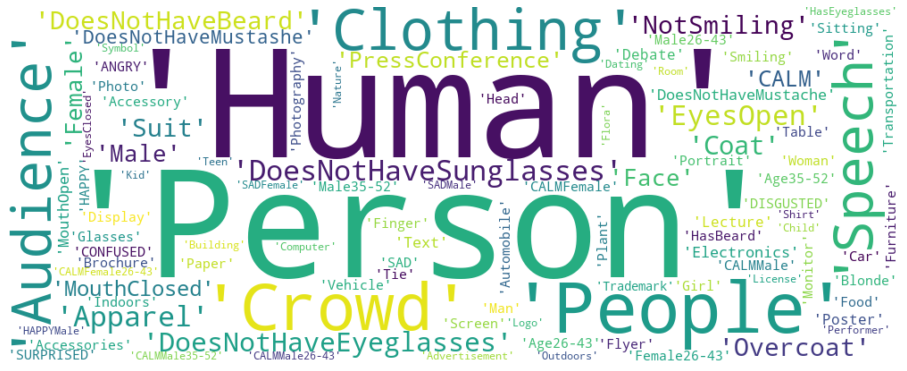

In [18]:
# Define the dictionary used to produce the name wordcloud
names = dict()
trunc_occurences = keyword_occurences[0:100] # Look at the top 100 tags
for s in trunc_occurences:
    names[s[0]] = s[1]

# Create the wordcloud
name_wordcloud = WordCloud(width=1000,height=400, background_color='white')
name_wordcloud.generate_from_frequencies(names)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(name_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# Break up the big names column into string arrays
df['name'] = df['name'].str.split(',')

# Convert these name tags to string values
df['name'] = df['name'].fillna("").astype('str')

In [20]:
# Use TF-IDF to calculate the similarity between name tags
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['name'])

# Check the TF-IDF matrix's shape
tfidf_matrix.shape

(12195, 206592)

In [21]:
# Calculate the cosine similarity of name tags from this TF-IDF matrix
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:20, :20]

array([[1.        , 0.0434968 , 0.04134319, 0.00966363, 0.01702361,
        0.02127874, 0.04487146, 0.00746275, 0.03884211, 0.03551823,
        0.02003637, 0.02292343, 0.05858753, 0.06186903, 0.03444317,
        0.03455882, 0.04090229, 0.03592327, 0.01392144, 0.0721728 ],
       [0.0434968 , 1.        , 0.07693016, 0.02975937, 0.04790818,
        0.0313273 , 0.0162524 , 0.01588112, 0.04153346, 0.0685137 ,
        0.04150375, 0.01965324, 0.0971194 , 0.0385718 , 0.06893383,
        0.03672824, 0.03975977, 0.06507398, 0.00862417, 0.04032827],
       [0.04134319, 0.07693016, 1.        , 0.09638089, 0.05181192,
        0.08745798, 0.03127429, 0.07009506, 0.03345335, 0.15775075,
        0.05269402, 0.07036422, 0.1656807 , 0.05822884, 0.08338636,
        0.03637558, 0.08691312, 0.06414369, 0.03893196, 0.04816918],
       [0.00966363, 0.02975937, 0.09638089, 1.        , 0.07683495,
        0.04507064, 0.02985105, 0.19315759, 0.01750921, 0.17966066,
        0.08869478, 0.02204997, 0.14507344, 0

In [0]:
# Create a Pandas Series to keep track of the video indices
indices = pd.Series(df.index, index=df['videoid'])

In [0]:
# Function that get video recommendations based on the cosine similarity score of top 50 features
def recommendations(videoid):
    idx = indices[videoid]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:51]
    
    video_indices = [i[0] for i in sim_scores]
    videos = df.iloc[video_indices][['videoid', 'name']]
    return videos

## Display 3 Sample Recommenders for 3 Random Videos

In [24]:
# First example with this video of ID = brightcove4520832752001
df[df['videoid'] == 'brightcove4520832752001']

,videoid,analysistype,timestamp,confidence,name
2,brightcove4520832752001,"[Objects, Objects, Objects, Objects, Objects, ...","[1.0, 20.0, 10.0, 22.0, 5.0, 1.0, 9.0, 3.0, 6....","[57.52568817138672, 59.65675735473633, 55.0348...","[""'Transportation'"", ""'Display'"", ""'Costume'"",..."


In [25]:
# Top 50 Recommendations for the video above
sampleRec1 = recommendations('brightcove4520832752001')
sampleRec1

,videoid,name
542,brightcove5740920109001,"[""'Person'"", ""'Human'"", ""'Human'"", ""'Person'"",..."
465,brightcove5654155249001,"[""'Car'"", ""'Machine'"", ""'Electronics'"", ""'Car'..."
716,brightcove5827904606001,"[""'Man'"", ""'Tire'"", ""'Machine'"", ""'Photo'"", ""'..."
318,brightcove5448347955001,"[""'SportsCar'"", ""'Kart'"", ""'Human'"", ""'Automob..."
286,brightcove5405407420001,"[""'Vehicle'"", ""'Rainbow'"", ""'Tar'"", ""'Transpor..."
719,brightcove5828970534001,"[""'SportsCar'"", ""'Car'"", ""'Wheel'"", ""'Car'"", ""..."
365,brightcove5511489011001,"[""'Driving'"", ""'Sitting'"", ""'Automobile'"", ""'M..."
730,brightcove5834080427001,"[""'Portrait'"", ""'Driving'"", ""'SportsCar'"", ""'A..."
462,brightcove5650402002001,"[""'Person'"", ""'Car'"", ""'Text'"", ""'Car'"", ""'Veh..."
686,brightcove5813689471001,"[""'Ground'"", ""'Nature'"", ""'Fog'"", ""'SportsCar'..."


In [26]:
# Second example with this video of ID = facebook10155494969258387
df[df['videoid'] == 'facebook10155494969258387']

,videoid,analysistype,timestamp,confidence,name
12192,facebook10155494969258387,"[Celebrities, Celebrities, Celebrities, Celebr...","[83.936, 57.076, 65.25, 12.731, 25.611, 32.751...","[50.0, 50.0, 50.0, 50.0, 57.95209884643554, 50...","[""'GautamRode'"", ""'GautamRode'"", ""'GautamRode'..."


In [27]:
# Top 50 Recommendations for the video above
sampleRec2 = recommendations('facebook10155494969258387')
sampleRec2

,videoid,name
2251,facebook10153714314899205,"[""'Accessories'"", ""'Face'"", ""'Human'"", ""'Man'""..."
2175,facebook10153688478684205,"[""'Face'"", ""'Clothing'"", ""'Text'"", ""'Man'"", ""'..."
3819,facebook10154178892499205,"[""'Photography'"", ""'Screen'"", ""'Shirt'"", ""'Clo..."
6367,facebook10154706652364205,"[""'Accessories'"", ""'Audience'"", ""'Person'"", ""'..."
7705,facebook10154935945329205,"[""'Portrait'"", ""'Clothing'"", ""'Face'"", ""'Photo..."
3825,facebook10154178919894205,"[""'Clothing'"", ""'Clothing'"", ""'Apparel'"", ""'Hu..."
6278,facebook10154689042339205,"[""'Bush'"", ""'Face'"", ""'Photo'"", ""'Human'"", ""'T..."
1536,facebook10153528368294205,"[""'Apparel'"", ""'Photo'"", ""'Monitor'"", ""'Court'..."
8600,facebook10155052264429205,"[""'Portrait'"", ""'MilitaryUniform'"", ""'Human'"",..."
7598,facebook10154923578589205,"[""'Art'"", ""'Photography'"", ""'Worker'"", ""'Human..."


In [28]:
# Third example with this video of ID = facebook10153983753624205
df[df['videoid'] == 'facebook10153983753624205']

,videoid,analysistype,timestamp,confidence,name
3053,facebook10153983753624205,"[Objects, Objects, Objects, Objects, Objects, ...","[289.0, 189.0, 138.0, 90.0, 279.0, 212.0, 15.0...","[61.02974319458008, 97.69052124023436, 96.8202...","[""'Face'"", ""'Speech'"", ""'Speech'"", ""'Speech'"",..."


In [29]:
# Top 50 Recommendations for the video above
sampleRec3 = recommendations('facebook10153983753624205')
sampleRec3

,videoid,name
1723,facebook10153582130779205,"[""'Crowd'"", ""'PressConference'"", ""'Lecture'"", ..."
1724,facebook10153582139824205,"[""'Clothing'"", ""'People'"", ""'Crowd'"", ""'Audien..."
1994,facebook10153642512714205,"[""'Crowd'"", ""'HomeDecor'"", ""'Human'"", ""'Overco..."
10387,facebook10155276880954205,"[""'Suit'"", ""'Word'"", ""'Paper'"", ""'Electronics'..."
3944,facebook10154212176634205,"[""'Person'"", ""'Audience'"", ""'Audience'"", ""'Cro..."
2375,facebook10153761198899205,"[""'Apparel'"", ""'Apparel'"", ""'Apparel'"", ""'Huma..."
2423,facebook10153770350539205,"[""'Audience'"", ""'Audience'"", ""'Person'"", ""'App..."
4793,facebook10154388296204205,"[""'Human'"", ""'Human'"", ""'Person'"", ""'Coat'"", ""..."
11458,facebook10155412927774205,"[""'Poster'"", ""'Head'"", ""'Head'"", ""'Suit'"", ""'P..."
10524,facebook10155294937434205,"[""'TabletComputer'"", ""'PressConference'"", ""'Pe..."
